<a href="https://colab.research.google.com/github/HridayAg0102/ML-models/blob/main/MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This model is used to predict the number from handwritten number's image


---



In [24]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

"""
Alternative method to load the dataset:
======================================

from keras.datasets import mnist
array = mnist.load_data()

train_images, train_labels = array[0]
test_images, test_labels = array[1]

"""

'\nAlternative method to load the dataset:\n======================================\n\nfrom keras.datasets import mnist\narray = mnist.load_data()\n\ntrain_images, train_labels = array[0]\ntest_images, test_labels = array[1]\n\n'

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
# Adding layers to the Neural Network

from keras import models
from keras import layers 

network = models.Sequential()
network.add(layers.Dense(512, activation= "relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation = "softmax"))


In [27]:
# aaplication of optimizer, loss function and metrics
# Loss function : gives direction to the model and helps it decide how it is performing
# metrics : on what basis we must judge the model (here "accuracy" is used, which is the number of correct predictions out of total predictions)
# optimizer : this is the way our model should transform itself to perform better.

network.compile(optimizer = "rmsprop",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [28]:
# Preparing image data

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255       # image size normalisation

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

train_images.shape


(60000, 784)

In [29]:
# Preparing the labels (Label Encoding)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


train_labels.shape

(60000, 10)

In [30]:
train_images.shape

(60000, 784)

In [31]:
test_images.shape

(10000, 784)

In [32]:

train_labels.shape


(60000, 10)

In [33]:
test_labels.shape

(10000, 10)

In [34]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2585 - accuracy: 0.9239
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1047 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0695 - accuracy: 0.9794
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0491 - accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0289 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0223 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0134 - accuracy: 0.9962
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0103 - accura

In [35]:
test_loss, test_accuracy = network.evaluate(test_images,test_labels)
print(f"test accuracy is: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9800
test accuracy is: 0.9800000190734863


In [36]:


# To get the array of predicted probablities:

probab = network.predict(test_images)

probab

array([[9.0882683e-12, 2.8049089e-12, 3.7656314e-08, ..., 9.9992883e-01,
        1.8514044e-09, 1.7134160e-07],
       [3.7836718e-13, 3.8583536e-07, 9.9999964e-01, ..., 8.0943238e-23,
        9.5151846e-12, 3.7860729e-22],
       [1.8866197e-10, 9.9998045e-01, 1.3463073e-06, ..., 1.0495692e-05,
        5.8842656e-06, 6.8609518e-10],
       ...,
       [7.5933190e-19, 1.8529304e-13, 2.7652691e-17, ..., 2.0151005e-09,
        2.9426961e-11, 5.2620584e-07],
       [1.2649201e-13, 2.4366155e-14, 1.2296307e-16, ..., 3.0810989e-14,
        2.5164346e-07, 2.2658608e-15],
       [2.1292436e-17, 3.7222291e-24, 2.0825556e-17, ..., 8.9313481e-23,
        9.7869425e-20, 5.7942154e-20]], dtype=float32)

In [37]:
# to check if these values are probabilities, sum of the values in one aray = 1

value = sum(probab[0])

value  # which is near to 1

1.0000000822391648

In [38]:
from google.colab import files
uploaded = files.upload()

Saving ml_sample.png to ml_sample (1).png


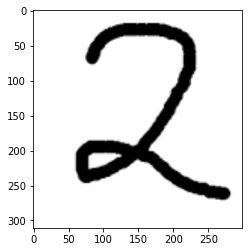

In [39]:
# loading the image in a variable

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ml_sample.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [40]:
img.shape

(311, 298, 3)

In [41]:
import numpy as np
from PIL import Image

img_pil = Image.fromarray(img)
img_new = np.array(img_pil.resize((28,28), Image.ANTIALIAS))

rgb_weights = [0.2989, 0.5870, 0.1140]

img_new = np.dot(img_new[...,:3], rgb_weights)
img_new.shape

(28, 28)

In [42]:
img_new = img_new.reshape((1,28*28))
img_new = img_new.astype('float32')/255

In [43]:
pred = network.predict(img_new)
pred

array([[0.0000000e+00, 0.0000000e+00, 6.1721165e-15, 6.9664197e-37,
        0.0000000e+00, 9.9624592e-01, 0.0000000e+00, 3.7540975e-03,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [44]:
# Model failed to predict the right result :(